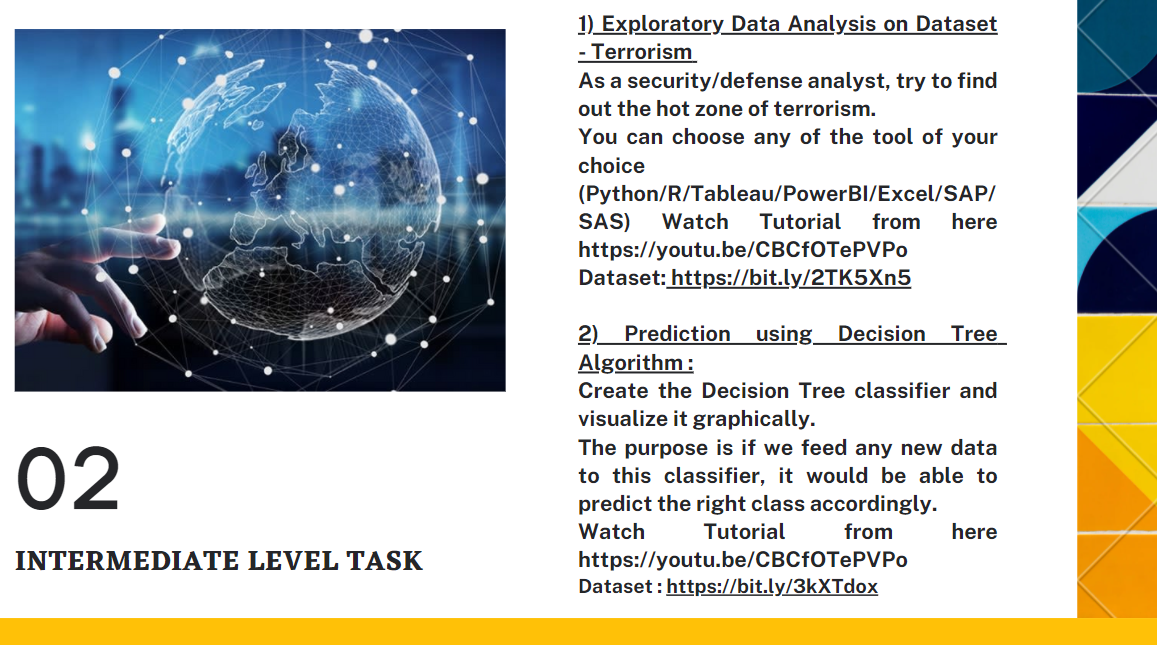

In [1]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('BG Task.png')
cv2_imshow(image)

**LetsGrowMore - Data Science Intern**

***AUTHOR : Jeeva K***

**Exploratory Data Analysis on Dataset - Terrorism**

**Importing All Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Loading Data**

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv")
data.head()

C:\Users\elcot\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Data Preprocessing Techniques**

      Missing values
      Data Cleaning
      Extract Features
      Feature Encoding
      Label Encoding
      Handle Outliers
      Separate Independent and dependent Features
      then Select best Feature

**Data Exploration**

  Data exploration is a key aspect of data analysis and    model building. Without spending significant time on understanding the data and its patterns one cannot expect to build efficient predictive models. Data exploration takes major chunk of time in a data science project comprising of data cleaning and preprocessing

**Missing values**

In [ ]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**Dropping the duplicate rows**

In [3]:
data.dropna(axis=1,inplace=True)

In [5]:
data

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,0,...,Al-Shabaab,0,5,Firearms,-9,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,1,...,Muslim extremists,0,6,Explosives,1,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,0,...,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,1,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,0,...,Unknown,0,6,Explosives,-9,START Primary Collection,-9,-9,0,-9


In [6]:
pd.set_option('display.max_columns', None)
data.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,crit2,crit3,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,0,1,1,0,1,0,2,Armed Assault,4,Military,Al-Shabaab,0,5,Firearms,-9,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,1,1,1,0,1,0,3,Bombing/Explosion,4,Military,Muslim extremists,0,6,Explosives,1,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,0,1,1,1,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,1,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,0,1,1,1,0,0,3,Bombing/Explosion,2,Government (General),Unknown,0,6,Explosives,-9,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,0,1,1,1,0,0,3,Bombing/Explosion,20,Unknown,Unknown,0,6,Explosives,0,START Primary Collection,-9,-9,0,-9


**Full summary of the dataframe**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [8]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

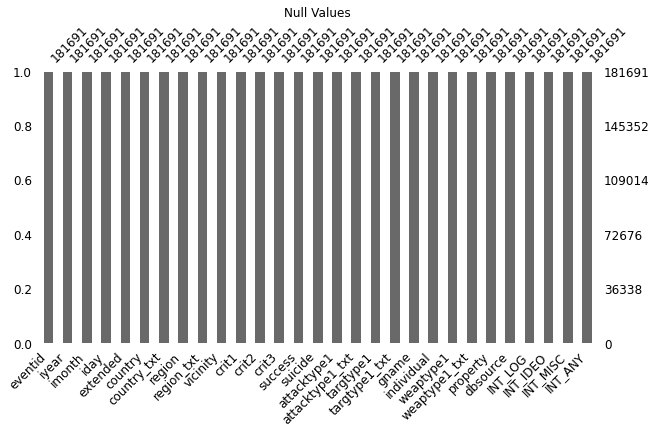

In [9]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12)
plt.title("Null Values")
plt.show()

**Statistical details of the dataset**

In [10]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,0.875668,0.889598,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,0.329961,0.313391,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Shape of dataset**

In [11]:
data.shape

(181691, 29)

**Find the dtypes in the Dataset**

In [12]:
data.dtypes

eventid             int64
iyear               int64
imonth              int64
iday                int64
extended            int64
country             int64
country_txt        object
region              int64
region_txt         object
vicinity            int64
crit1               int64
crit2               int64
crit3               int64
success             int64
suicide             int64
attacktype1         int64
attacktype1_txt    object
targtype1           int64
targtype1_txt      object
gname              object
individual          int64
weaptype1           int64
weaptype1_txt      object
property            int64
dbsource           object
INT_LOG             int64
INT_IDEO            int64
INT_MISC            int64
INT_ANY             int64
dtype: object

**Finding all the column names inside the dataset**

In [13]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

**Check the dataset for duplicate and dropping element**

In [14]:
data.duplicated().sum()

0

**Function return Series with number of distinct observations over requested axis**

In [15]:
data.nunique()

eventid            181691
iyear                  47
imonth                 13
iday                   32
extended                2
country               205
country_txt           205
region                 12
region_txt             12
vicinity                3
crit1                   2
crit2                   2
crit3                   2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
targtype1              22
targtype1_txt          22
gname                3537
individual              2
weaptype1              12
weaptype1_txt          12
property                3
dbsource               26
INT_LOG                 3
INT_IDEO                3
INT_MISC                3
INT_ANY                 3
dtype: int64

**Find the correlation of dataset**

In [16]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.070646,0.002019,0.026215,-0.016789,-0.082972,0.137743,0.074173,0.079080,0.017939,-0.011716,-0.278927,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,-0.016784,-0.082963,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,0.000176,-0.002845,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,-0.004889,-0.011802,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,0.048533,0.073233,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135039,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,-0.040288,-0.037827,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401371,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,-0.010175,-0.030909,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070646,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,-0.054995,-0.002223,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.002019,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,-0.040589,-0.010733,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026215,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,-0.031425,-0.013476,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752


**Find the covariance of dataset**

In [17]:
data.cov()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,success,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.758162e+18,1.758136e+10,1.215513e+07,2.142901e+08,2.531537e+07,-2.012842e+10,1.561161e+09,2.665520e+07,285008.489466,2.878966e+06,-7.345284e+06,-3.447851e+07,3.425400e+07,1.884160e+08,6.976986e+08,1.290038e+06,-3.376308e+07,-1.154987e+09,-8.651271e+08,-8.193224e+08,-5.868057e+07,-1.092352e+09
iyear,1.758136e+10,1.758125e+02,6.242262e-03,2.133346e+00,2.531306e-01,-2.012587e+02,1.561196e+01,2.665952e-01,0.002816,2.878497e-02,-7.343309e-02,-3.447430e-01,3.425204e-01,1.883636e+00,6.977080e+00,1.290383e-02,-3.382436e-01,-1.154928e+01,-8.651191e+00,-8.193172e+00,-5.867640e-01,-1.092283e+01
imonth,1.215513e+07,6.242262e-03,1.148060e+01,1.641577e-01,-3.296497e-04,-2.401545e+00,-2.980705e-02,-4.339471e-03,0.000566,4.867217e-04,1.969523e-04,-3.021044e-03,1.951415e-03,4.352627e-02,-2.136689e-02,-3.052474e-04,5.790673e-02,-6.153977e-02,-3.544087e-02,-3.196423e-02,-4.919620e-03,-1.007191e-01
iday,2.142901e+08,2.133346e+00,1.641577e-01,7.768738e+01,-8.619090e-03,3.435862e+00,2.510455e-01,-1.345995e-02,0.010731,-1.972682e-03,-1.421926e-02,-3.260104e-02,5.939028e-03,-9.005096e-02,-3.024007e-03,-1.810916e-03,-5.783055e-02,-1.074416e-01,-6.165944e-02,-6.625714e-02,-1.015634e-02,-4.958130e-02
extended,2.531537e+07,2.531306e-01,-3.296497e-04,-8.619090e-03,4.329018e-02,-4.786916e-01,2.343019e-02,1.052885e-03,-0.000333,2.151745e-05,3.331890e-03,4.775166e-03,-1.325232e-03,1.085281e-01,1.607768e-02,-1.007517e-04,9.397042e-02,-1.361658e-03,6.784522e-02,7.250359e-02,3.233023e-03,7.883593e-02
country,-2.012842e+10,-2.012587e+02,-2.401545e+00,3.435862e+00,-4.786916e-01,1.263703e+04,4.900113e+01,-3.931649e-01,-0.079551,-3.582670e-01,-1.494367e+00,-1.332648e+00,-1.061759e+00,-4.605181e+00,-1.473765e+01,1.702069e-01,-5.792542e+00,1.125183e+01,3.570412e+01,3.522003e+01,1.324586e+01,8.075042e+01
region,1.561161e+09,1.561196e+01,-2.980705e-02,2.510455e-01,2.343019e-02,4.900113e+01,8.604882e+00,6.149991e-02,0.007972,-3.197879e-03,-9.848692e-03,-2.841512e-02,6.198744e-02,4.294396e-02,8.079926e-01,-9.539671e-03,8.452176e-02,-1.678962e+00,-1.100687e+00,-9.782681e-01,7.193582e-02,-6.591745e-01
vicinity,2.665520e+07,2.665952e-01,-4.339471e-03,-1.345995e-02,1.052885e-03,-3.931649e-01,6.149991e-02,8.097033e-02,0.000101,-1.258694e-05,-5.163545e-03,-1.982772e-04,4.457272e-04,3.545564e-03,4.665929e-02,-1.849708e-04,9.254173e-04,-1.760471e-02,1.873056e-02,1.995002e-02,-1.331574e-03,1.378348e-02
crit1,2.850085e+05,2.816169e-03,5.658263e-04,1.073126e-02,-3.329764e-04,-7.955112e-02,7.971792e-03,1.008945e-04,0.011339,-7.922769e-05,-1.426098e-03,-3.581771e-04,3.802117e-04,5.618841e-03,-2.835943e-02,-1.477906e-04,6.771017e-03,-2.525486e-03,4.352945e-02,4.438436e-02,9.498638e-04,4.110648e-02
crit2,2.878966e+06,2.878497e-02,4.867217e-04,-1.972682e-03,2.151745e-05,-3.582670e-01,-3.197879e-03,-1.258694e-05,-0.000079,6.859658e-03,-8.588069e-04,-3.497945e-04,4.302015e-05,8.182677e-04,-5.594778e-02,1.487330e-05,-1.538921e-03,-7.012951e-04,-9.089010e-03,-9.151962e-03,-6.111371e-04,-1.078304e-02


**Find the Series containing counts of unique values**

In [18]:
data.value_counts()

eventid       iyear  imonth  iday  extended  country  country_txt         region  region_txt                   vicinity  crit1  crit2  crit3  success  suicide  attacktype1  attacktype1_txt    targtype1  targtype1_txt                gname                         individual  weaptype1  weaptype1_txt  property  dbsource                  INT_LOG  INT_IDEO  INT_MISC  INT_ANY
197000000001  1970   7       2     0         58       Dominican Republic  2       Central America & Caribbean  0         1      1      1      1        0        1            Assassination      14         Private Citizens & Property  MANO-D                        0           13         Unknown        0         PGIS                       0        0        0          0         1
201309100037  2013   9       10    0         4        Afghanistan         6       South Asia                   0         1      1      1      0        0        1            Assassination      3          Police                       Unknown          

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


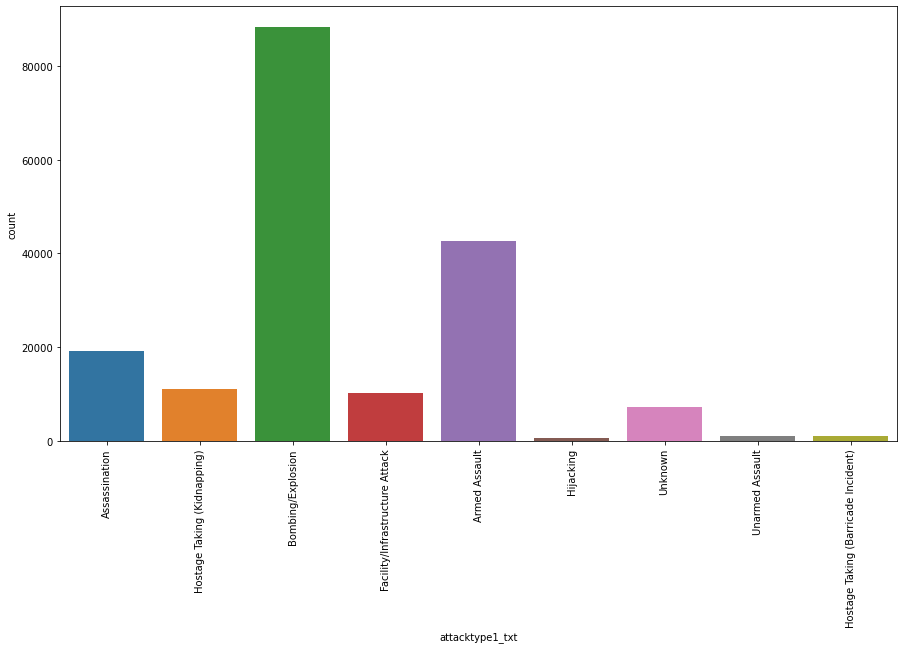

In [19]:
print(data['attacktype1_txt'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['attacktype1_txt'])
plt.xticks(rotation=90)
plt.show()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


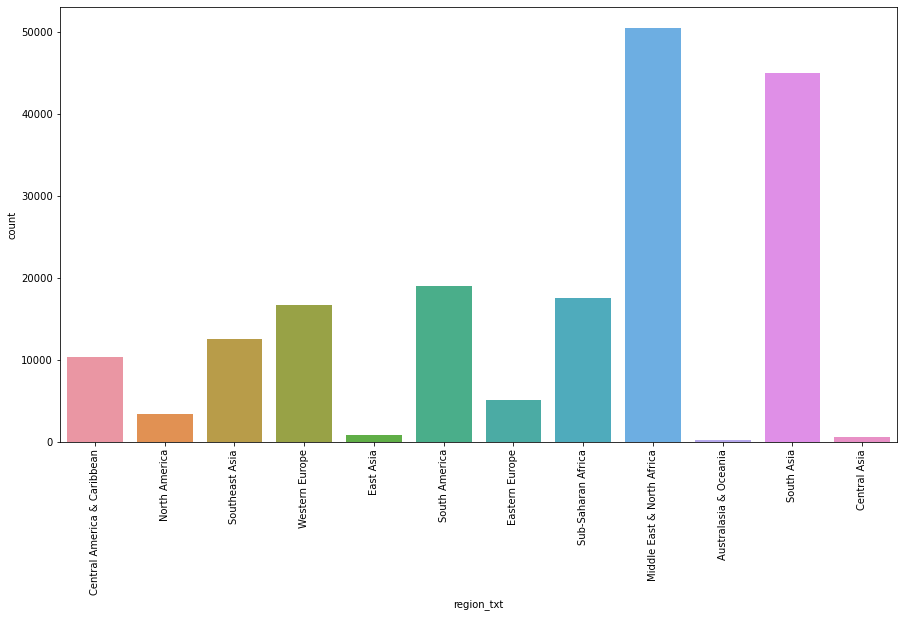

In [20]:
print(data['region_txt'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['region_txt'])
plt.xticks(rotation=90)
plt.show()

**Pie Chart**

In [21]:
label = data['attacktype1_txt'].unique()
label

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

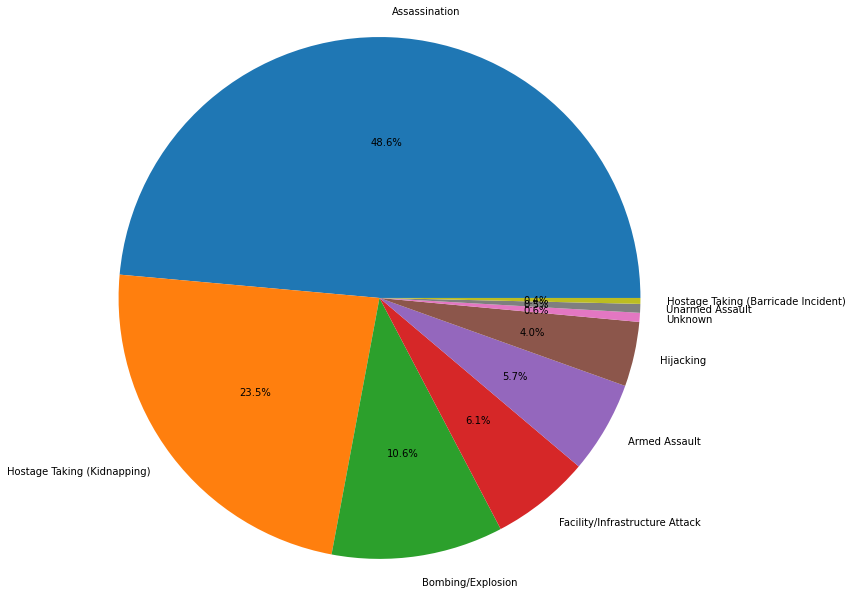

In [22]:
plt.pie(x=data['attacktype1_txt'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=3)
plt.show()

In [23]:
label = data['targtype1_txt'].unique()
label

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

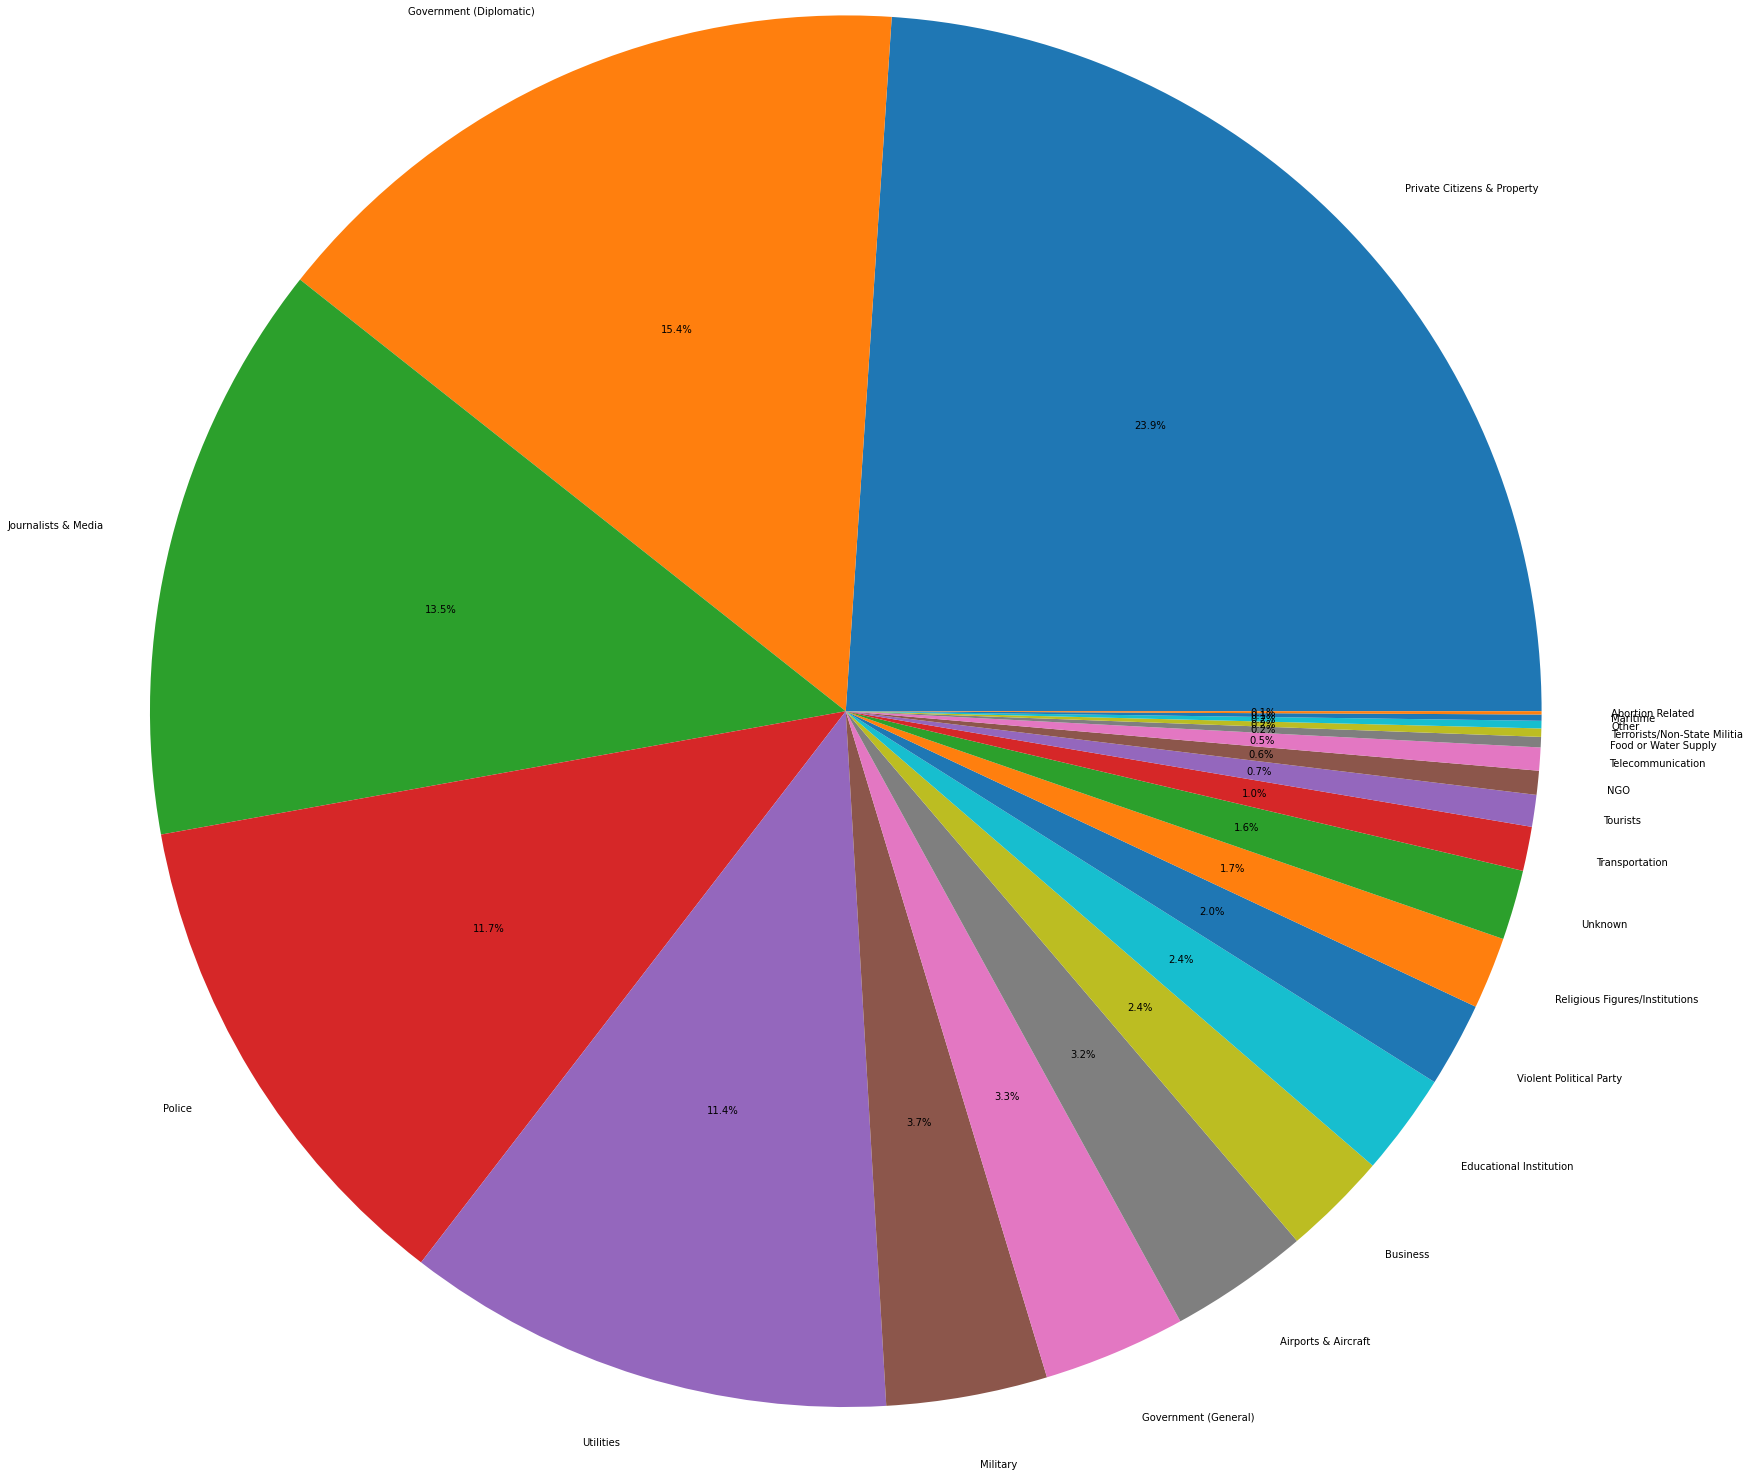

In [24]:
plt.pie(x=data['targtype1_txt'].value_counts(),labels = label,rotatelabels=False,autopct='%1.1f%%',radius=8)
plt.show()

**Heatmap of dataset**

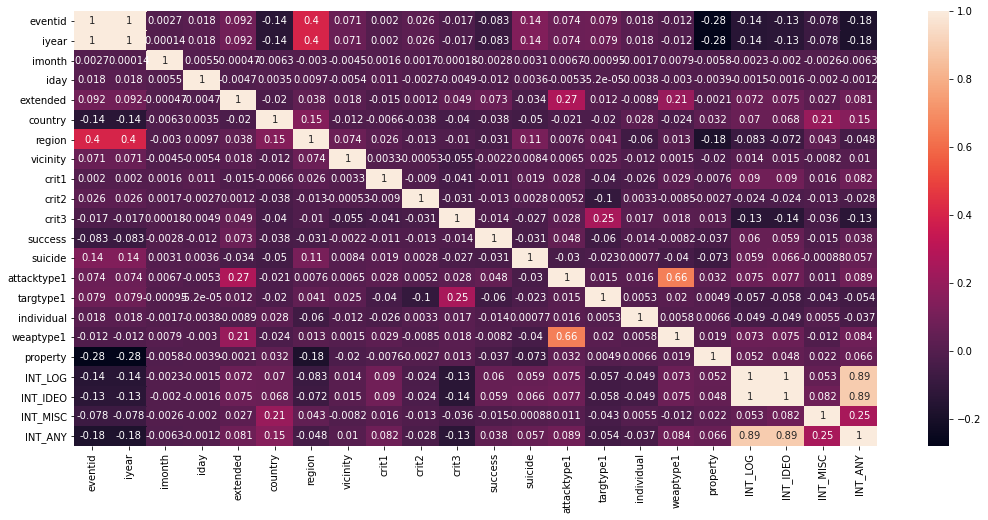

In [25]:
fig,axes = plt.subplots(1,1,figsize=(18,8))
sns.heatmap(data.corr(), annot= True)
plt.show()

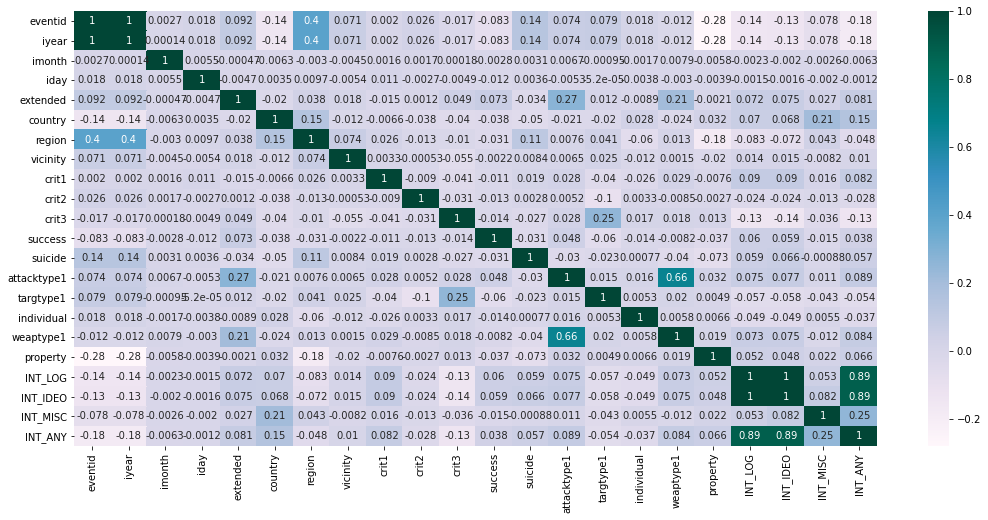

In [26]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap='PuBuGn')
plt.show()

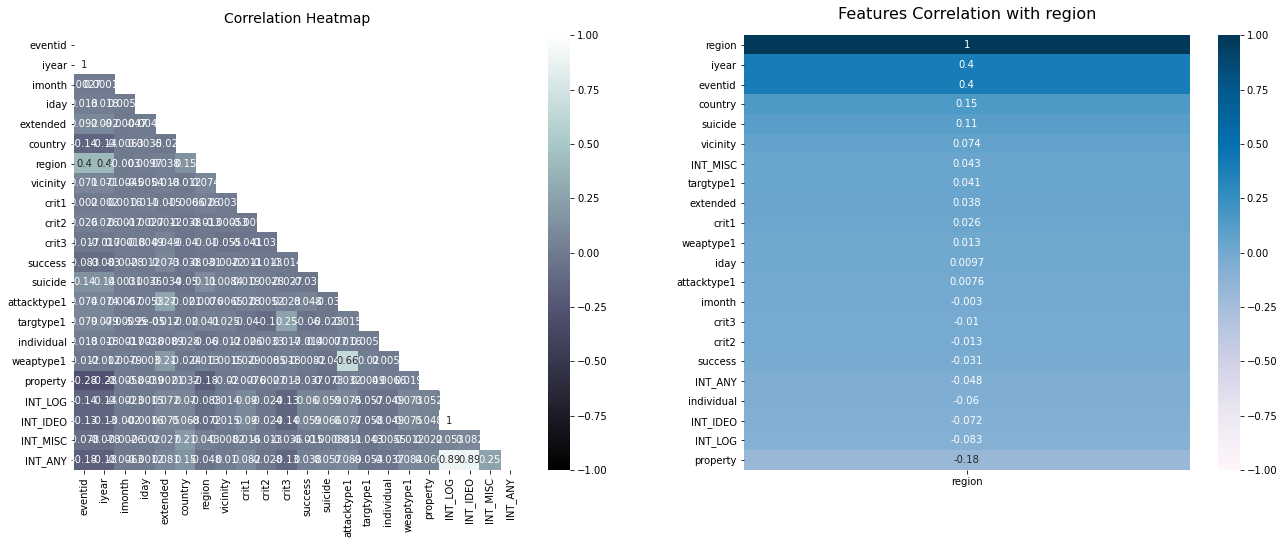

In [27]:
fig,ax=plt.subplots(ncols=2,figsize=(22,8))
resign_corr = data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='bone')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['region']].sort_values(by='region',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='PuBu')
heatmap.set_title('Features Correlation with region', fontdict={'fontsize':16}, pad=16);

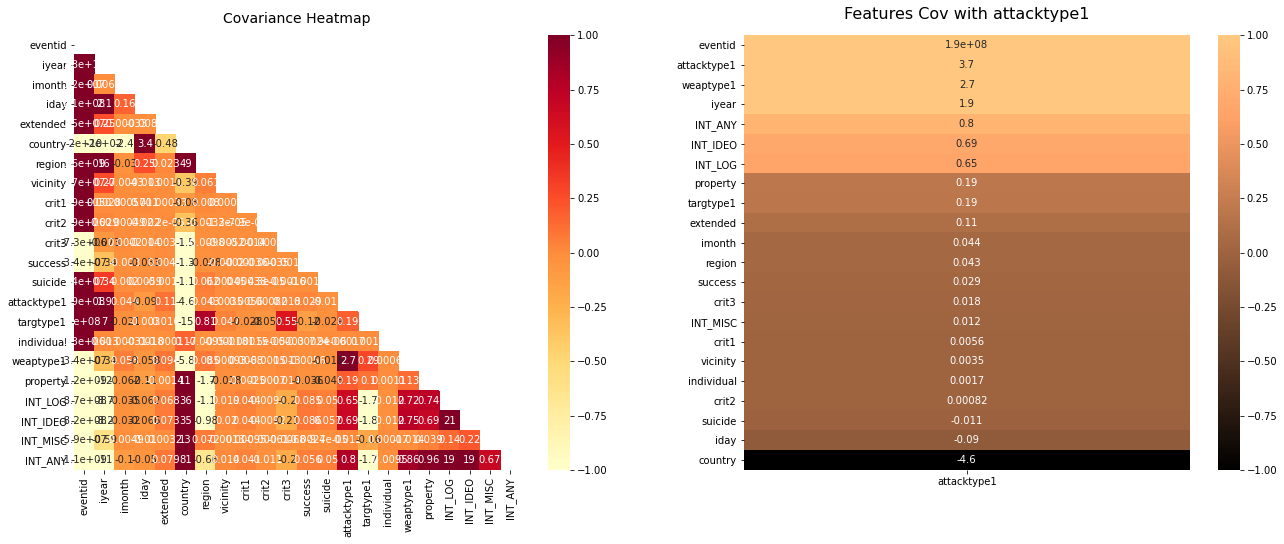

In [28]:
fig,ax=plt.subplots(ncols=2,figsize=(22,8))
resign_cov = data.cov()
mask = np.triu(np.ones_like(resign_cov, dtype=np.bool))
cat_heatmap = sns.heatmap(data.cov(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='YlOrRd')
cat_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_cov[['attacktype1']].sort_values(by='attacktype1',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='copper')
heatmap.set_title('Features Cov with attacktype1', fontdict={'fontsize':16}, pad=16);

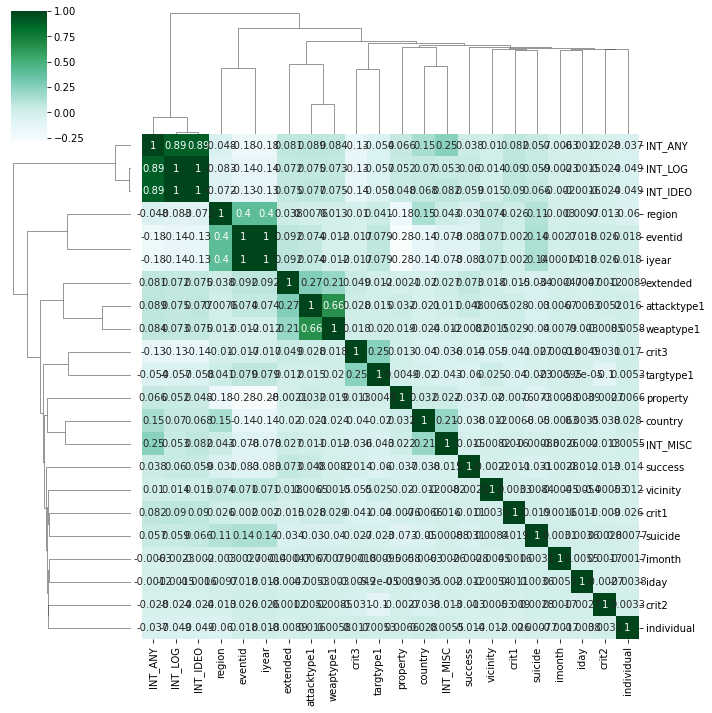

In [29]:
sns.clustermap(data.corr(),annot=True,cmap='BuGn')

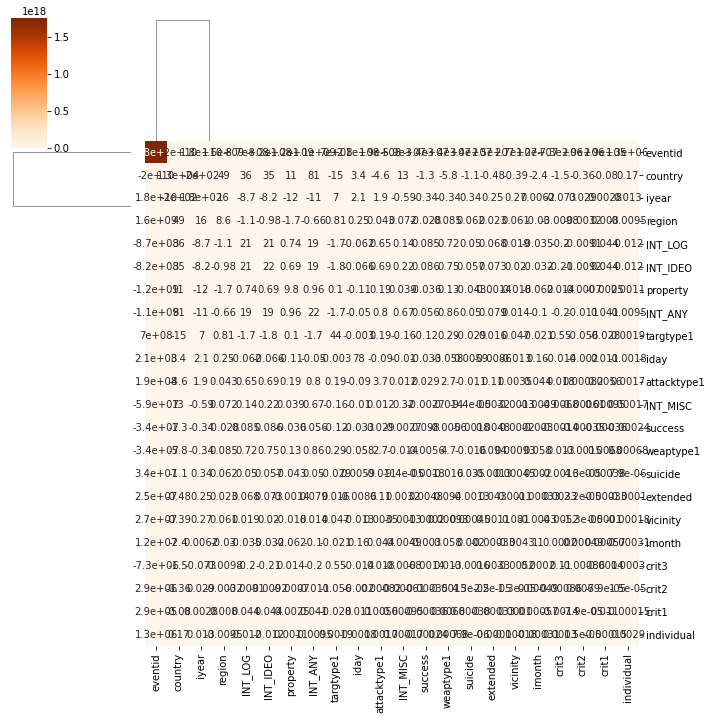

In [30]:
sns.clustermap(data.cov(),annot=True,cmap='Oranges')

**Count plot**

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


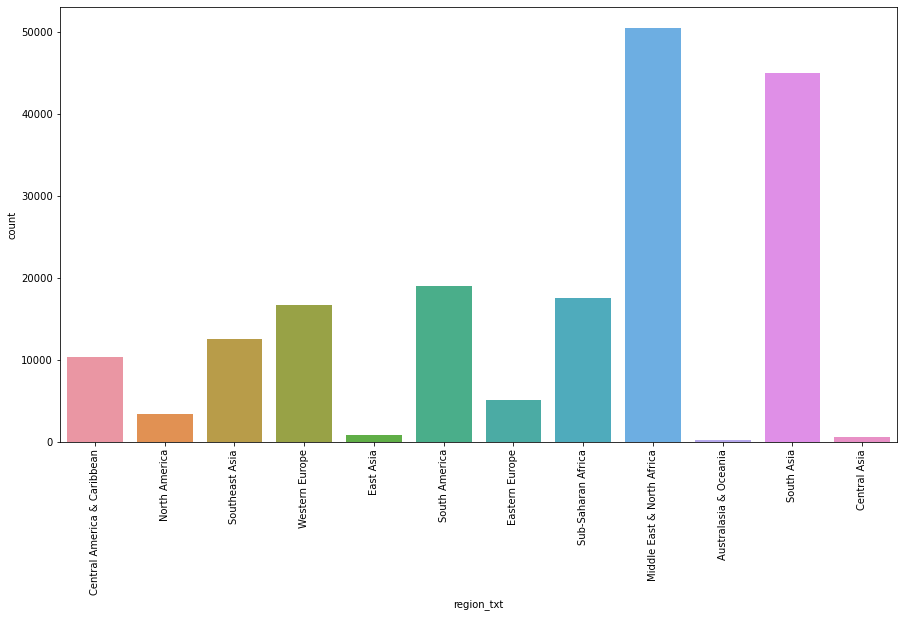

In [31]:
print(data['region_txt'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=data['region_txt'])
plt.xticks(rotation=90)
plt.show()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


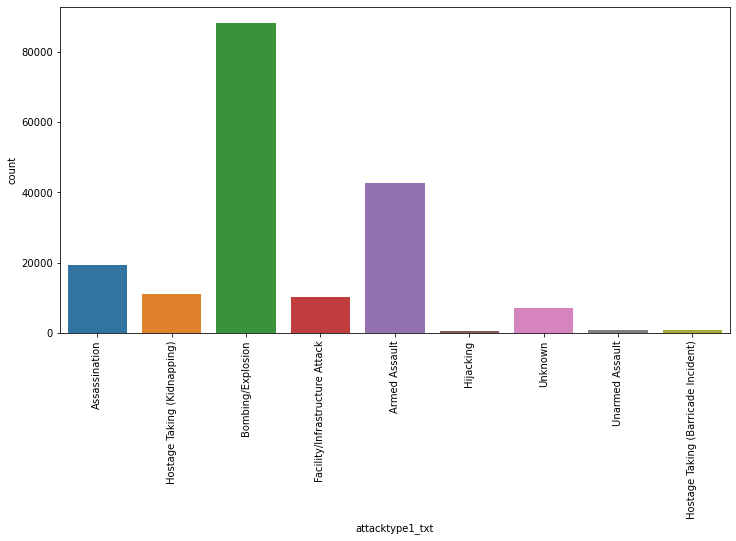

In [32]:
print(data['attacktype1_txt'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=data['attacktype1_txt'])
plt.xticks(rotation=90)
plt.show()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


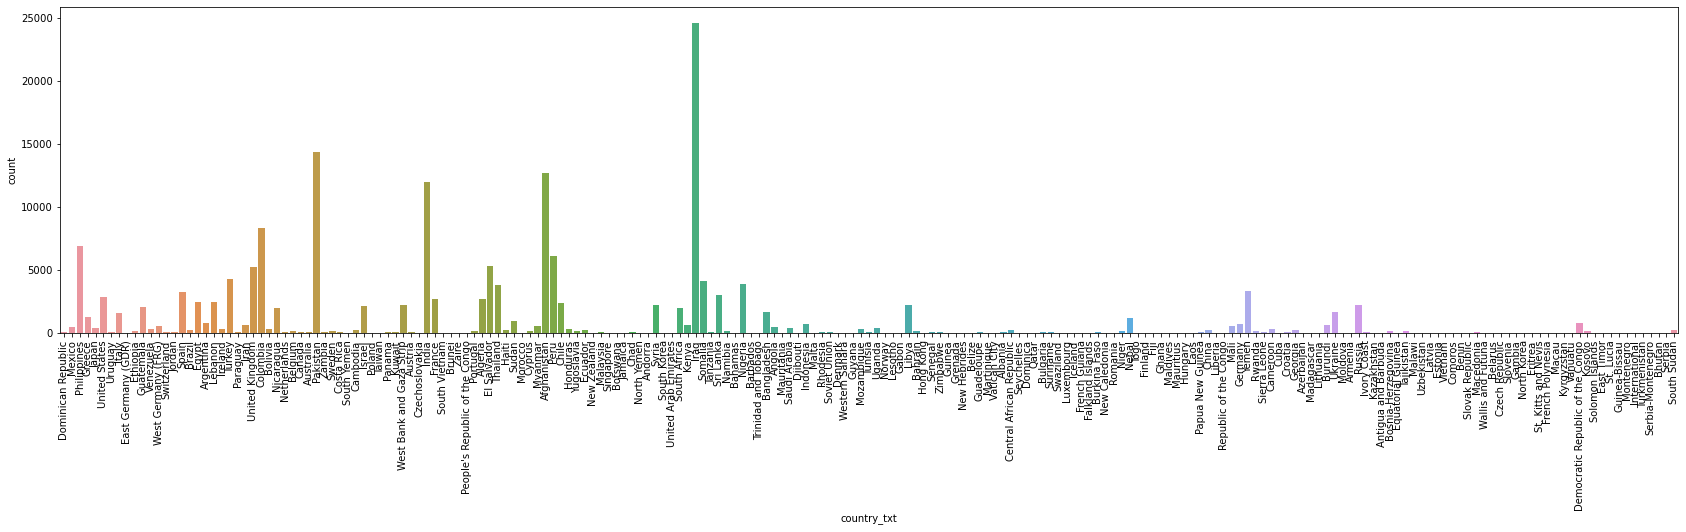

In [33]:
print(data['attacktype1_txt'].value_counts())
plt.figure(figsize=(29,6))
sns.countplot(x=data['country_txt'])
plt.xticks(rotation=90)
plt.show()

**Bar plot**

<AxesSubplot:xlabel='attacktype1_txt', ylabel='weaptype1'>

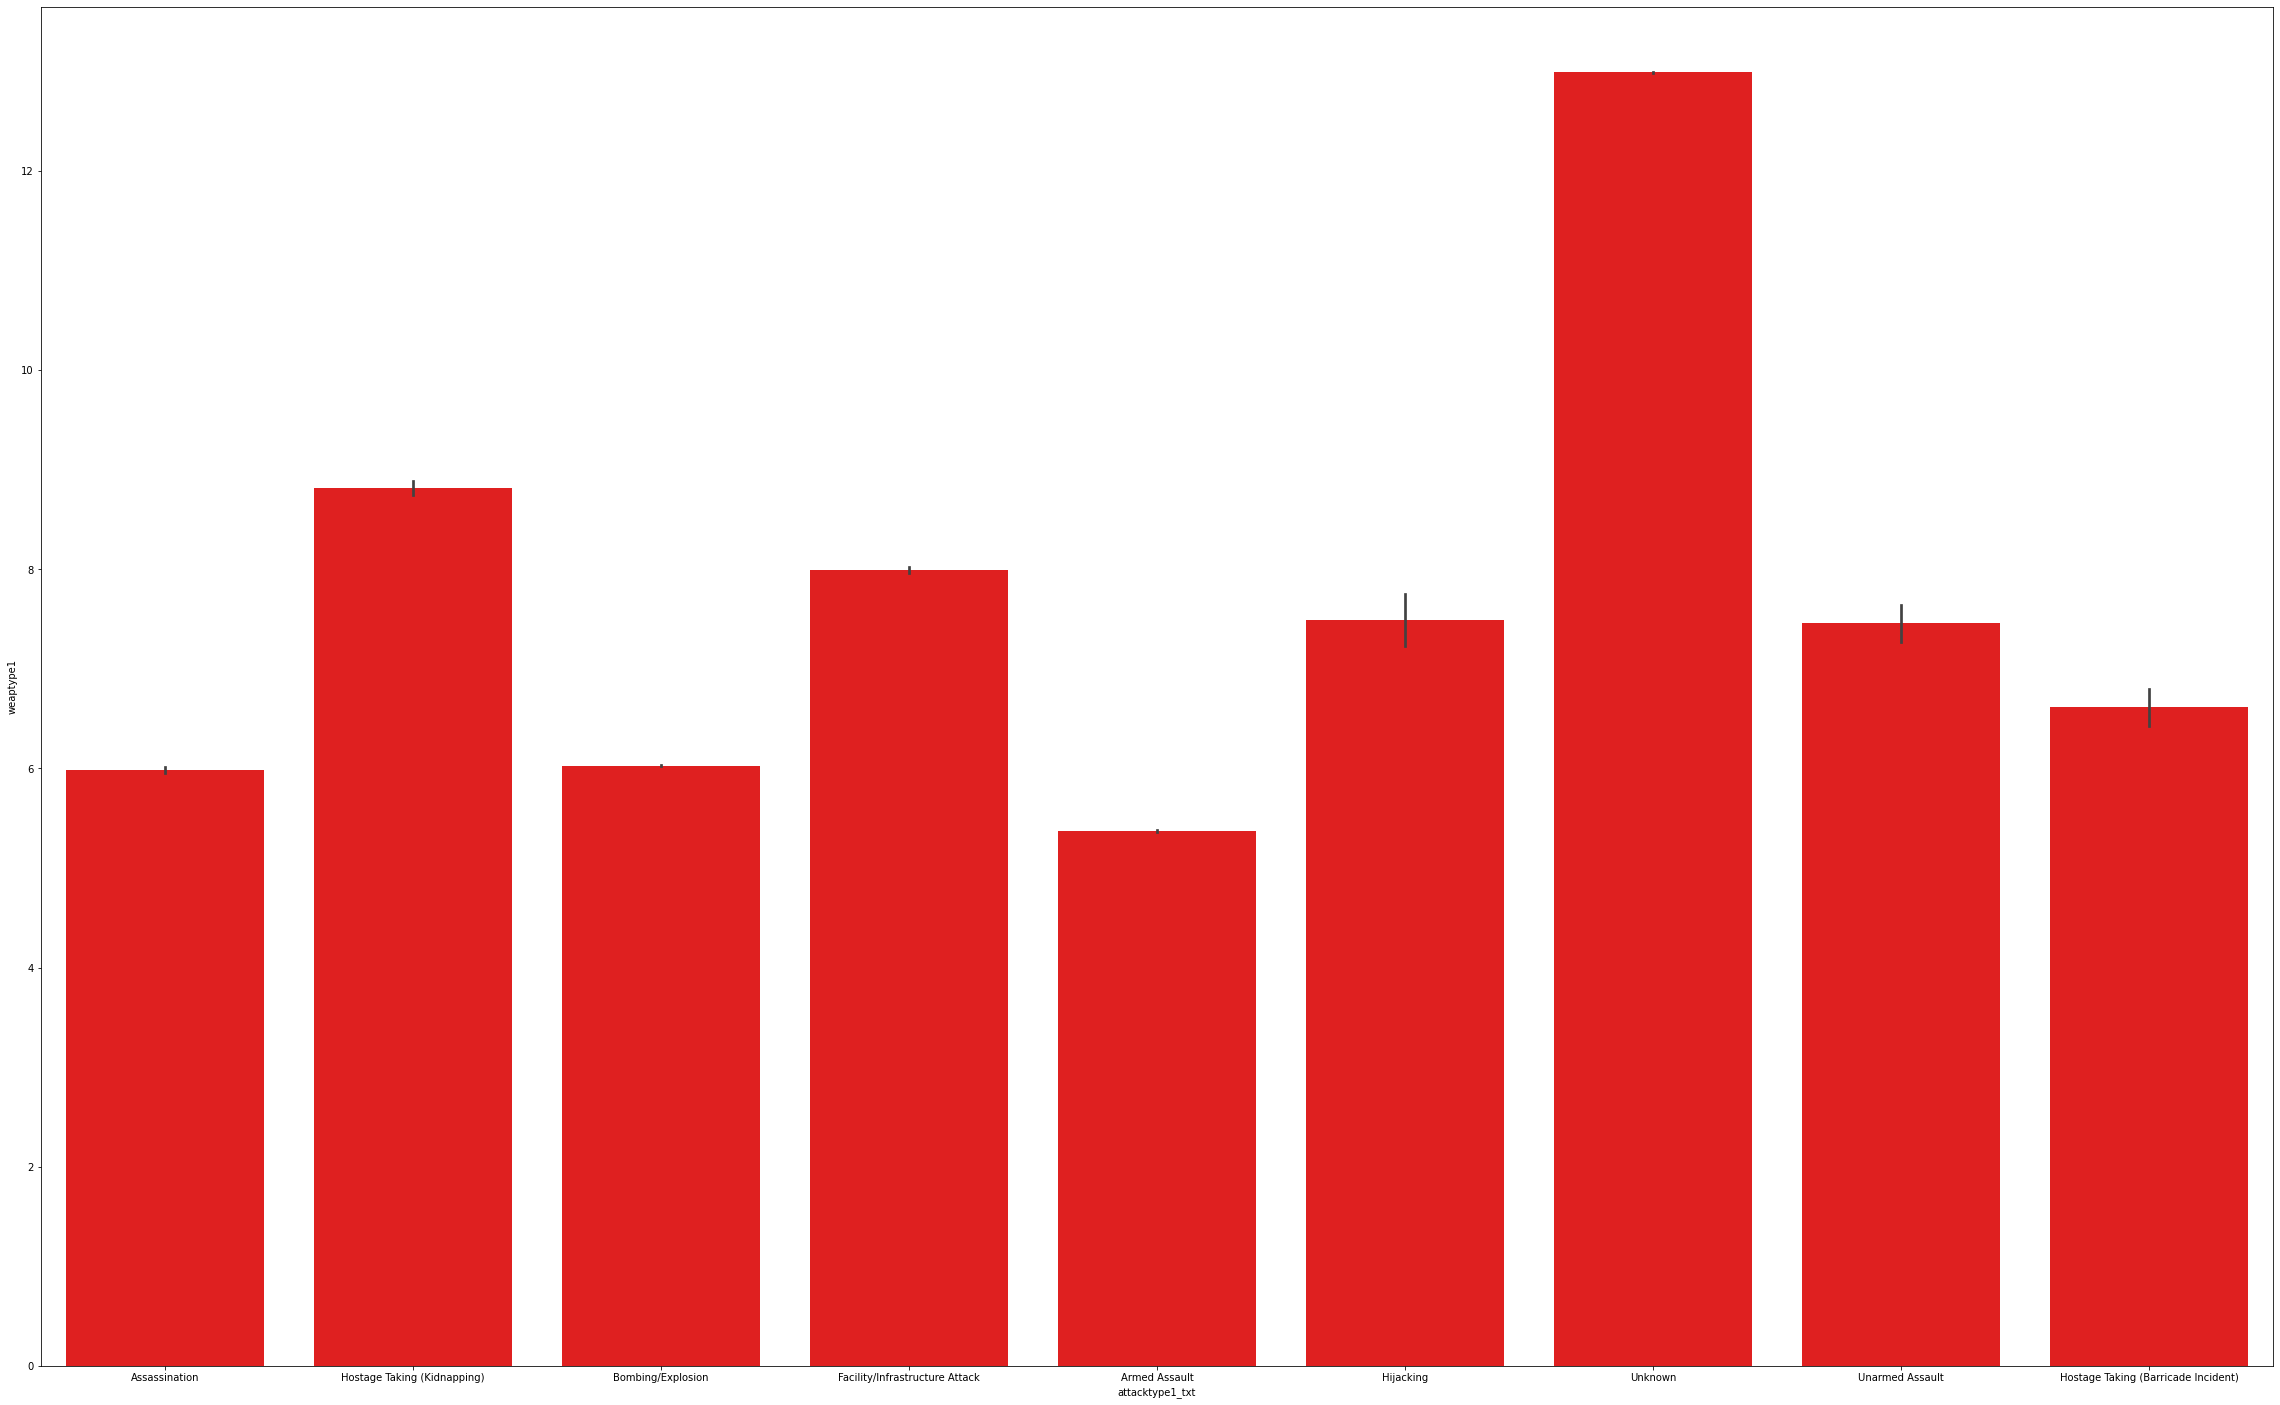

In [34]:
plt.figure(figsize=(40,25))
sns.barplot(x=data['attacktype1_txt'], y=data['weaptype1'],color='red')

**Outlier detection and Outlier imputation if availabale in data**

In [37]:
def plot(data,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

C:\Users\elcot\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\elcot\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


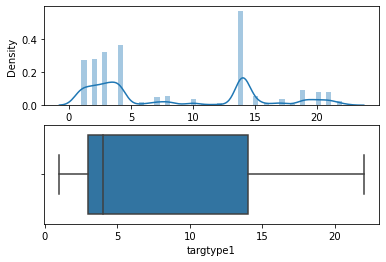

In [38]:
plot(data,'targtype1')

**Histogram**

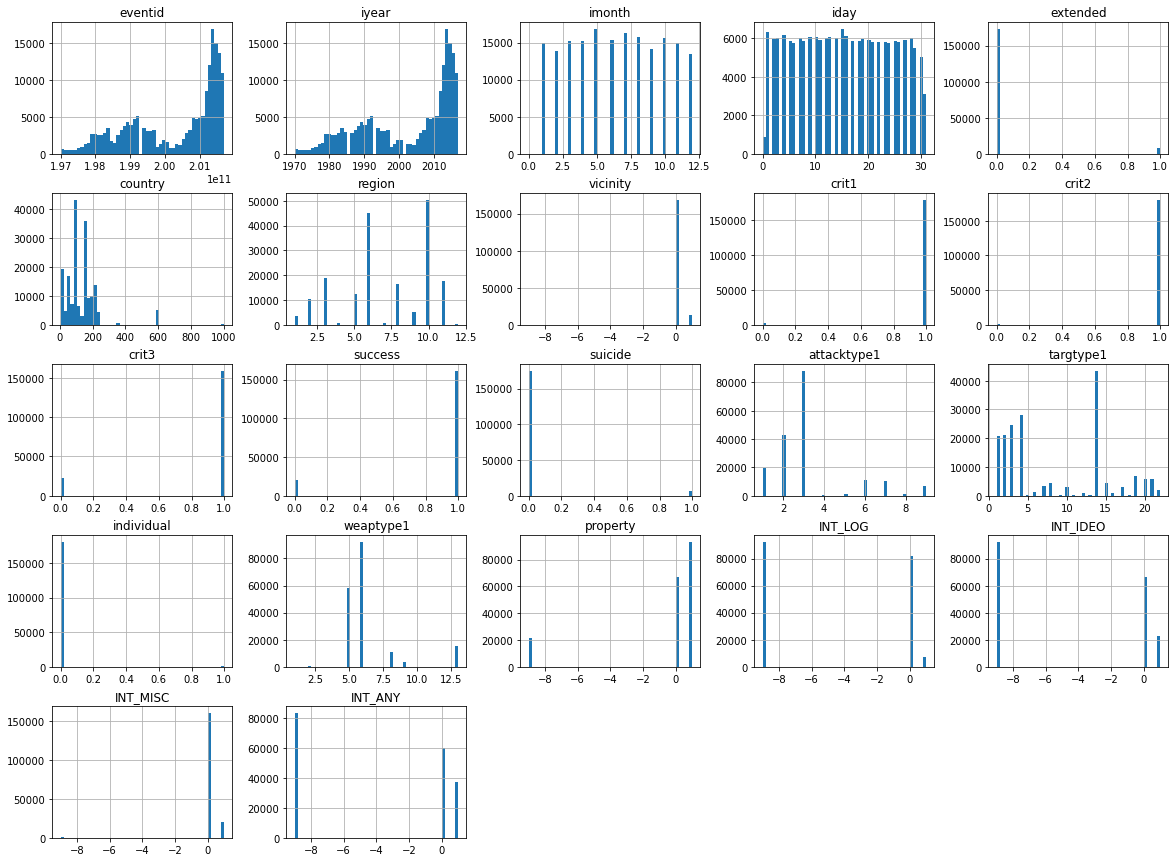

In [39]:
data.hist(bins=50 ,figsize=(20,15))
plt.show()